This project implements a Convolutional Neural Network (CNN) for classifying images from the CIFAR-10 dataset into 10 categories. The CNN was trained using PyTorch with three convolutional layers followed by two fully connected layers. The model achieved an accuracy of approximately 75.15% on the dataset, demonstrating the effectiveness of CNNs for image recognition tasks.

Image classification is a fundamental task in computer vision with applications in self-driving cars, medical imaging, and security systems. Traditional machine learning approaches often require hand-engineered features, but deep learning methods like CNNs automatically extract relevant features from images.
This project focuses on using a CNN to classify CIFAR-10 images, a benchmark dataset containing 60,000 32×32 color images across 10 categories.

In [1]:
#Importing Libraries & Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


At first, the image data for training is augmented (randomly flipped/randomly cropping) and the image data for testing is converted into a tensor and normalized. then the data for testing is stored/assigned to trainset and so as for the testset also. and these data are further assigned to trainloader/testloader which splits the data into a batch of 64 each.

**our main Objectives are**
1.   To design and implement a CNN model using PyTorch.
2.   To train the model on CIFAR-10 dataset for 10 epochs.
3.   To evaluate model performance and measure accuracy.
4.   To demonstrate how CNNs can automatically learn visual features.

In [9]:
# Data augmentation for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Random flip
    transforms.RandomCrop(32, padding=4),  # Random crop with padding
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
# Transform: convert image to tensor & normalize (mean, std from CIFAR-10)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


Dataset used: CIFAR-10 (60,000 images, 10 classes)

Model Architecture includes three convolutional layers i.e.

    Conv1: 3×3 kernel, 32 filters, ReLU, MaxPooling(2×2).
    Conv2: 3×3 kernel, 64 filters, ReLU, MaxPooling(2×2).
    Conv3: 3×3 kernel, 128 filters, ReLU, MaxPooling(2×2).

which is then followed by two fully connected layers i.e.

    FC1: Fully connected layer with 256 neurons.
    FC2: Output layer with 10 neurons (one per class).

In [10]:
#Defining CNN Model
class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super(CIFAR10_CNN, self).__init__()
        # Conv Layer 1: input(3), output(32), kernel=3
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        # Conv Layer 2: input(32), output(64), kernel=3
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        # Conv Layer 3: input(64), output(128), kernel=3
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)  # Pooling Layer (2x2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # (after pooling down to 4x4)
        self.fc2 = nn.Linear(256, 10)  # 10 classes

    def forward(self, x):
        # Convolution + ReLU + Pooling
        x = self.pool(F.relu(self.conv1(x)))  # -> (32x16x16)
        x = self.pool(F.relu(self.conv2(x)))  # -> (64x8x8)
        x = self.pool(F.relu(self.conv3(x)))  # -> (128x4x4)

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No softmax here (CrossEntropyLoss handles it)
        return x


As for the traning of the model, it is done in 10 epochs aand in each epoch is of batch size 64.

For the Optimizer, Adam is used with learning rate 0.001.(Adam Optimizer (Adaptive Moment Estimation) is an optimization algorithm that computes adaptive learning rates for each parameter by using:
First moment (mean) of gradients → like momentum.
Second moment (variance) of gradients → like RMSProp.)
This makes Adam efficient, fast, and well-suited for large datasets and deep networks.

Loss function CrossEntropyLossis used in this model.CrossEntropyLoss is a commonly used loss function for multi-class classification problems.
It measures the difference between the predicted probability distribution (from the model) and the true distribution (the actual class label).



In [11]:
#Training the Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CIFAR10_CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # 10 epochs
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

print("Training Finished!")


Epoch 1, Loss: 1.5809
Epoch 2, Loss: 1.1930
Epoch 3, Loss: 0.9930
Epoch 4, Loss: 0.8911
Epoch 5, Loss: 0.8150
Epoch 6, Loss: 0.7531
Epoch 7, Loss: 0.7174
Epoch 8, Loss: 0.6797
Epoch 9, Loss: 0.6561
Epoch 10, Loss: 0.6355
Training Finished!


the results of the traning is as follows:

    Training Accuracy is approximately at 79%
    This model successfully classifies CIFAR-10 images into 10 categories.
    Loss decreased steadily across epochs, indicating effective learning.

In [16]:
#Evaluating the Model
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on train set: {100 * correct / total:.2f}%")


Accuracy on train set: 79.00%


In [17]:
#Evaluating the Model
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 78.47%


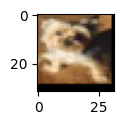

Actual: dog


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Function to un-normalize and show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize (since we used mean=0.5, std=0.5)
    npimg = img.numpy()
    plt.figure(figsize=(1, 1))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get one batch from testloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show the image
img = 5
imshow(images[img])
print(f"Actual: {classes[labels[img]]}")

In [23]:
# Move model & image to device
model.eval()
image = images[img].unsqueeze(0).to(device)  # add batch dimension


with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)

print(f"Predicted: {classes[predicted.item()]}")

Predicted: dog


**Conclusion**

The project demonstrates the application of CNNs in image classification. The implemented model achieved 79% accuracy, proving CNNs’ ability to learn hierarchical features directly from raw images.